In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

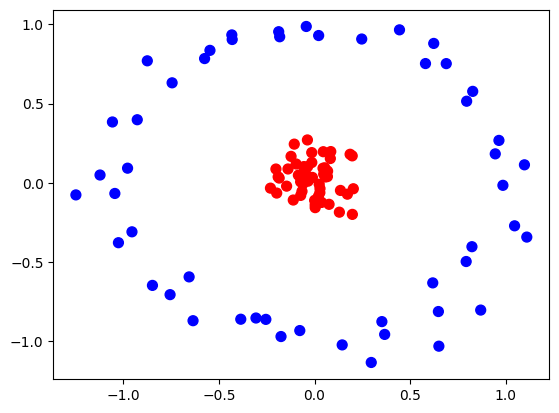

In [99]:
from sklearn.datasets._samples_generator import make_circles

X,y=make_circles(100,factor=.1,noise=.1)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="bwr")

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [101]:
clf=SVC(kernel="linear")

clf.fit(X_train,y_train.ravel())
y_pred=clf.predict(X_test)

In [102]:
y_train

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [103]:
y_train.ravel()

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.55

<Axes: >

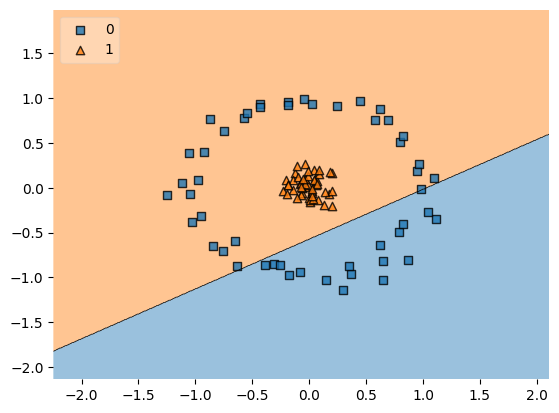

In [105]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=clf,legend=2)